In [4]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [2]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# hyper parameters
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs =2
batch_size = 100
learning_rate = 0.001

In [6]:
# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data',
    train=True,
    transform=transforms.ToTensor(),
    download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
    train=False,
    transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True)

test_loader = DataLoader(dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False)

In [8]:
examples = iter(train_loader)
data, labels = next(examples)
print(data.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


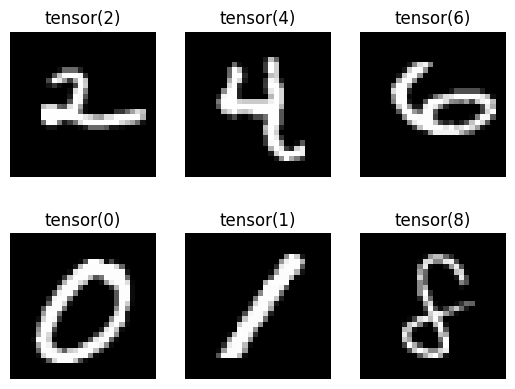

In [9]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(data[i][0], cmap='gray')
    plt.title(labels[i])
    plt.axis('off')
plt.show()

In [10]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [ ]:
model = NeuralNet(input_size, hidden_size, num_classes)

# loss and optimizer
criterion = nn.CrossEntropyLoss() # this will apply softmax
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [13]:
# training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [100/600], Loss: 0.5049
Epoch [1/2], Step [200/600], Loss: 0.3391
Epoch [1/2], Step [300/600], Loss: 0.3107
Epoch [1/2], Step [400/600], Loss: 0.3461
Epoch [1/2], Step [500/600], Loss: 0.2960
Epoch [1/2], Step [600/600], Loss: 0.2711
Epoch [2/2], Step [100/600], Loss: 0.1754
Epoch [2/2], Step [200/600], Loss: 0.1868
Epoch [2/2], Step [300/600], Loss: 0.2983
Epoch [2/2], Step [400/600], Loss: 0.3402
Epoch [2/2], Step [500/600], Loss: 0.1404
Epoch [2/2], Step [600/600], Loss: 0.1898


In [14]:
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        # max returns (value, index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 95.16 %
